# Data Science Project: Assessment 3

ID: 201500568

Name: Megha Kulshrestha

This assessment has a 60% weight.

## Case study

Refer to the brief

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives
 To build and fit a model which predicts the fraudulent "BitsBank" credit card transactions to improve the bank's market reputation that is gaining the good customer's satisfaction rating and retaining the existing customers.By using the anonymous data of customer payment's records with the target to reduce bank's loss on missing the fraudulent transaction's identification and missing to correctly label the normal (non-fraudulent) transactions. Model should maintain the wrong predictions of the missed fraudulent transactions below 0.02% for the sum of 100 million pounds credit card transactions amount.Also, to limit the missed normal cases below 25% of the sum of 200 thousand pounds transactions done by the customer using credit card.

To pre-process the data for making it fit for modelling. To study the literature on the deviation or exception mining for selecting methods of the anomaly detection. As part of this activity implementing and comparing two techniques for the anomaly (fraud) detection and suggesting the best method out of these two. Based on the evaluation of these techniques and using performance matrices like F-Score, precision, recall, AUC, ROC or confusion matrix, reporting the results with graphs for final inferences and recommendations.




###  b) Plan
Please demonstrate how you have conducted the project with a simple Gantt chart.

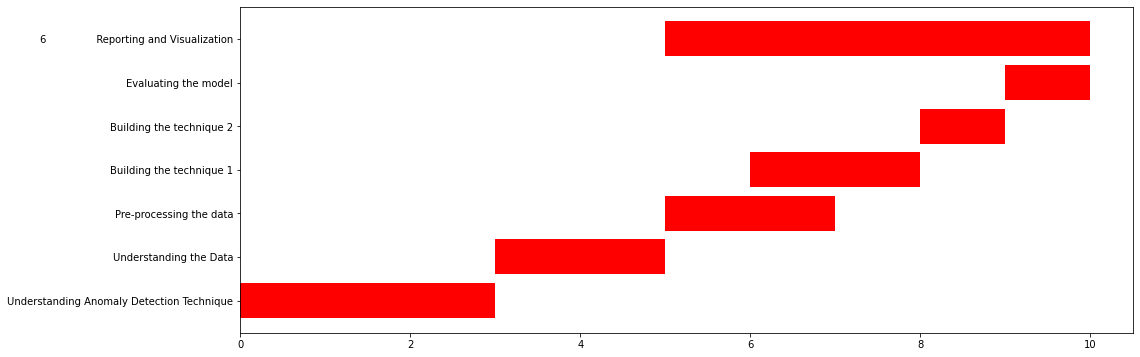

In [317]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
data = {'task': ['Understanding Anomaly Detection Technique', 'Understanding the Data',
                 'Pre-processing the data', 'Building the technique 1', 'Building the technique 2','Evaluating the model','6                Reporting and Visualization'],
        'startdate': ['2021-09-20', '2021-09-23', '2021-09-25', '2021-09-26', '2021-09-28',
                      '2021-09-29','2021-09-25'],
        'enddate': ['2021-09-23','2021-09-25','2021-09-27','2021-09-28','2021-09-29',
                    '2021-09-30','2021-09-30'],
        'completion': [0.9, 1.0, 1.0,0.5,0.5,0.0,0.0]}
plan_data = pd.DataFrame(data)
plan_data['enddate'] = pd.to_datetime(plan_data['enddate'])
plan_data['startdate'] = pd.to_datetime(plan_data['startdate'])
proj_start_date = plan_data.startdate.min()
# number of days from project start to task start
plan_data['start_num'] = plan_data['startdate']-proj_start_date
# number of days from project start to end of tasks
plan_data['end_num'] = plan_data['enddate']-proj_start_date
# days between start and end of each task
plan_data['days_start_to_end'] = plan_data.end_num - plan_data.start_num
#Plot the Gantt Chart for the project
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(plan_data.task, plan_data['days_start_to_end'].dt.days, left=plan_data['start_num'].dt.days, color = 'red')
plt.show()


## 2. Understanding the case study (4 marks)

###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)

200-300 words

1. Budget allotted by the bank for building an Fraud Prediction Application is 1 million pounds.
2. Model has to built on historical data provided by bank. Anonymous and reduced dimensionality data is provided by applying PCA.
3. Bank has provided the limit on model prediction for maximum of 20 false positive cases out of the sum of 100 million pounds normal credit card transactions. And maximum limit for false negative cases is 5 for the sum of 200k pounds fraudulent transactions.
4. There are 28 anonymous features along with 'time' and 'amount' attributes. 'class' attribute as the label of the instance.
5. This clearly is the classification problem with two binary classes 0 - Normal Transaction and 1 - Fraudulent Transaction with imbalanced distribution of classes with fraudulent class 1 - 492 records and normal class 0 - 284316
6. Studied about various resampling techniques after splitting the data into train and test, based on the best f-score,planning for undersampling method for normal cases to decrease the imbalanced class ratio. Analyzed other methods too like oversampling.
7. For building a right fit model I will model following anomaly techniques after pre-processing steps -
   i.  Proximity Based model - Mahalanobis Distance for computing mean and covariance matrix is not selected because the data is not normally distributed.
   ii. One Class Classification - SVM
   iii.Reconstruction - Autoencoder - To compress the attributes by encoding to lower dimensions representation of training data.
   iv. Information Theortics - Kolmogrov
8. Comparing these two model's performance


## 3. Pre-processing applied (20 marks)
Enter the code in the cells below to execute each of the stated sub-tasks. 


###  a) Preparing the labels appropriately

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import seaborn as sns

cc_transactions = pd.read_csv('C:/5122 Data Science/Assignment/creditcard.csv') # 284807
#Converting to lower case to avoid mistakes in column reference with different type of case.
cc_transactions.columns = map(str.lower, cc_transactions.columns)
#Renamed the class column to more meaningful column name
cc_transactions.rename(columns={'class':'fraud'}, inplace=True)
print(cc_transactions.head())

   time        v1        v2        v3        v4        v5        v6        v7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        v26       v27       v28 

###  b) Removing synonymous and noisy attributes
Time attribute does not contribute in predicting the pattern of fraud transactions.

In [332]:
#Time attribute does not contribute in predicting the pattern of fraud transactions.
cc_transactions = cc_transactions.drop('time', axis = 1)
cc_transactions.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,fraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###  c) Dealing with missing values
There are no missing and null values in the given dataset.

In [320]:
print(cc_transactions.isna().sum())
print(cc_transactions.isnull().sum())

v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
fraud     0
dtype: int64
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
fraud     0
dtype: int64


###  d) Rescaling if necessary


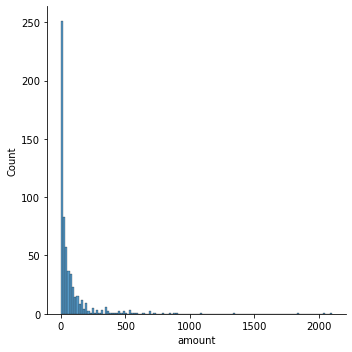

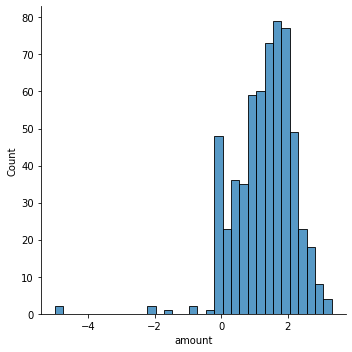

In [333]:
# To check the variability of
RANDOM_NUM = 65
#Right Skewed amount column
sns.displot(data=cc_transactions.sample(600, random_state=RANDOM_NUM), x="amount")
#Scaled the amount column using log based scaling to get the normally distributed column
cc_transactions['amount'] = np.log10(cc_transactions.amount+0.00001)
sns.displot(data=cc_transactions.sample(600, random_state=RANDOM_NUM), x="amount")

In [334]:
#Undersampling the imbalanced class
#Splitting Class
RATIO_TO_FRAUD =  45
fraud =  cc_transactions[cc_transactions.fraud == 1]
normal = cc_transactions[cc_transactions.fraud == 0]
normal_undersample = normal.sample(int(len(fraud) * RATIO_TO_FRAUD), random_state= RANDOM_NUM)
#Concatenating undersampled normal records with
undersampled_normal_fraud = pd.concat([fraud, normal_undersample])
features, label = undersampled_normal_fraud.drop('fraud', axis = 1), undersampled_normal_fraud.fraud.values

#284,315 to 7,380 (undersampled)

### e) Other
We can tell the data is slightly more uniform and proportionally distributed.
The ranges were also shrunk to fit between 0 and 1.

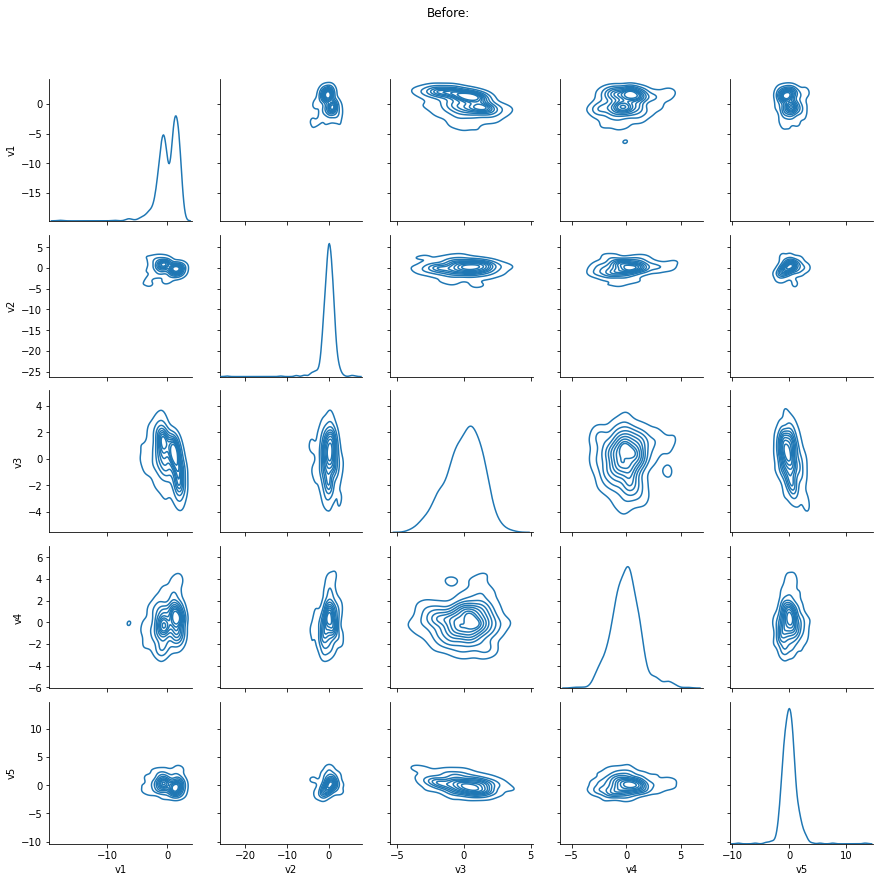

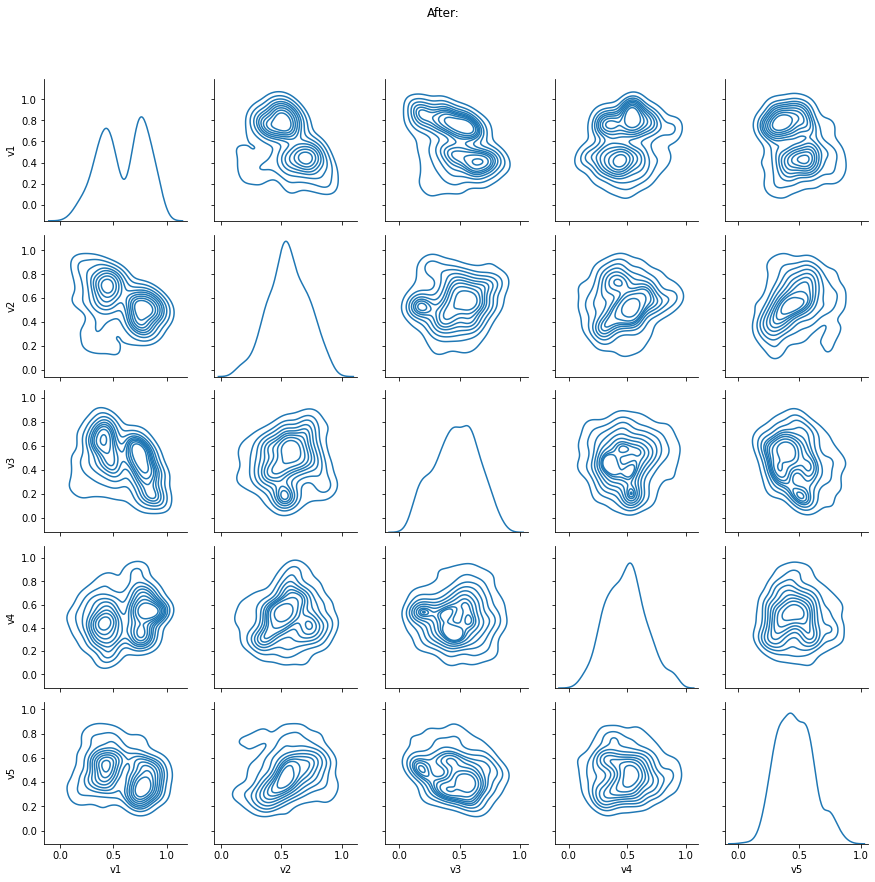

In [335]:
# Normalizing and Standardizing for handling randomness to optimize by converging the gradient descent.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# shuffle our training set
TRAINING_SAMPLE = 200000
clean = normal.sample(frac=1).reset_index(drop=True)

# training set: exclusively non-fraud transactions in an unsupervised manner
X_train = clean.iloc[:TRAINING_SAMPLE].drop('fraud', axis=1)

# testing  set: the remaining non-fraud + all the fraud
X_test = clean.iloc[TRAINING_SAMPLE:].append(fraud).sample(frac=1)

X_train, X_validate = train_test_split(X_train, test_size=0.2, random_state=RANDOM_NUM)
X_test, Y_test =  X_test.drop('fraud', axis = 1), X_test.fraud.values

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

#Before
g = sns.PairGrid(X_train.iloc[:,:5].sample(600, random_state=RANDOM_NUM))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Before:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

#After

g = sns.PairGrid(pd.DataFrame(X_train_transformed, columns=list(undersampled_normal_fraud.drop('fraud', axis=1).columns)).iloc[:,:5].sample(600, random_state=42))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('After:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);


## 4. Technique 1 (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

100-200 words
Training: only non-fraud
Split into:
Actual training of our autoencoder
Validation of the neural network's ability to generalize
Testing : mix of fraud and non-fraud
Treated like new data
Attempt to locate outliers
Compute reconstruction loss
Apply threshold

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale
Exponential Linear Unit - elu

In [336]:
import tensorflow as tf
# data dimensions // hyperparameters
input_dim = X_train_transformed.shape[1]
print(input_dim)
BATCH_SIZE = 256
EPOCHS = 500

# https://keras.io/layers/core/

autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

29
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 29)                870       
_________________________________________________________________
dense_235 (Dense)            (None, 16)                480       
_________________________________________________________________
dense_236 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_237 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_238 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_239 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_240 (Dense)            (None, 8)            

### c) Optimising hyper parameters


In [325]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')
print(datetime.now().strftime('%Y%m%d%H%M'))

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=False,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
);


202109301729
Epoch 1/500
625/625 [==============================] - 2s 3ms/step - loss: 0.0371 - acc: 0.2049 - val_loss: 0.0166 - val_acc: 0.2104

In [326]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)


### d) Performance metrics for training

84315
492


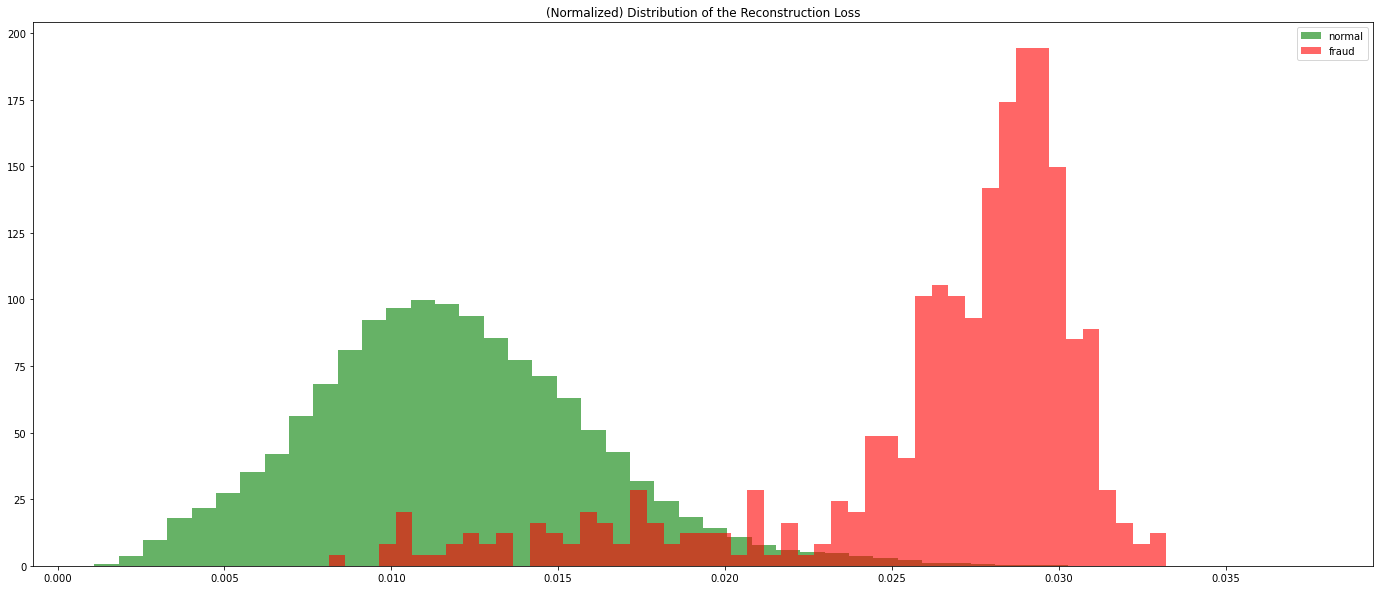

In [327]:
mse =  np.mean(np.power(X_test_transformed - reconstructions,2),axis=1)

clean = mse[Y_test==0]
fraud = mse[Y_test==1]
print(len(clean))
print(len(fraud))

fig, ax = plt.subplots(figsize=(24,10))

ax.hist(clean, bins=50, density=True, label="normal", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [328]:
THRESHOLD = 3

def mad_score(points):
    """https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm """
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)

    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD

print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")


Detected 1,127 outliers in a total of 84,807 transactions [1.33%].


In [330]:
from sklearn.metrics import (confusion_matrix,
                             average_precision_score)

# get (mis)classification
cm = confusion_matrix(Y_test, outliers)

# true/false positives/negatives
(tn, fp,
 fn, tp) = cm.flatten()

precision = tp/(tp + fp)
recall = tp/(fn+tp)
fscore = 2 * precision * recall/(precision + recall)

print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught successfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")
#F-Measure = (2 * Precision * Recall) / (Precision + Recall)
print(fscore)
print('AUPRC = {}'.format(average_precision_score(Y_test, outliers)))

The classifications using the MAD method with threshold=3 are as follows:
[[83595   720]
 [   85   407]]

% of transactions labeled as fraud that were correct (precision): 407/(720+407) = 36.11%
% of fraudulent transactions were caught succesfully (recall):    407/(85+407) = 82.72%
0.5027794935145151
AUPRC = 0.2997466939894286


## 5. Technique 2 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

100-200 words


Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale


In [337]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
X = cc_transactions
Y =  X['fraud']
del X['fraud']
#Split the data into training and test sets in a 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

weights = (Y==0).sum()/(1.0 *  (Y==1).sum())
print(weights)
xgb_classifier1 = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
xgb_prediction1 = xgb_classifier1.fit(X_train, Y_train).predict_proba(X_test)

print('AUPRC = {}'.format(average_precision_score(Y_test, xgb_prediction1[:,1])))

577.8760162601626


C:\Users\Megha\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUPRC = 0.8748917762705053


### c) Optimising hyper parameters


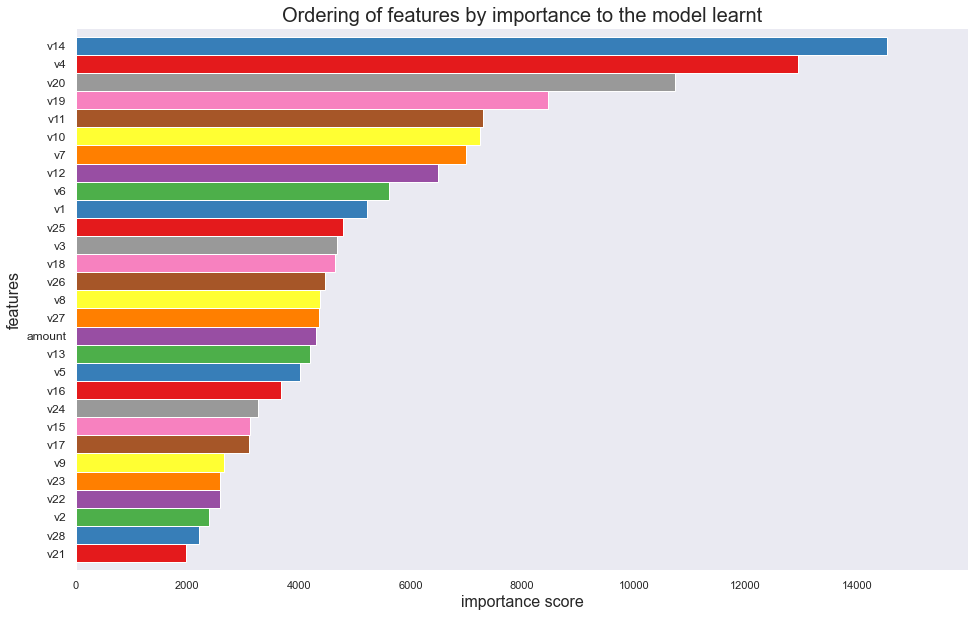

In [338]:
fig = plt.figure(figsize = (16, 10))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_classifier1, height = 1, color = colours, grid = False,
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

### d) Performance metrics for training

In [ ]:
# define outlier detection model
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel="linear", gamma='scale', nu=0.01)

In [ ]:
#Training for normal transactions which is proportionally very high in comparison with fraudulent transactions
trainX = normal
model.fit(trainX)

In [ ]:
# detect outliers in the test set
print(type(X_test))
print(type(Y_test))
#X_test['fraud'] = Y_test.tolist()

yhat = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

# mark inliers 1, outliers -1
X_test[X_test.fraud == 1] = -1
X_test[X_test.fraud == 0] = 1

score = f1_score(X_test.fraud, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)
cm = confusion_matrix(X_test.fraud, yhat)
print(cm)

## 6. Comparison of metrics performance for testing (16 marks)
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting

### b) Comparison with appropriate metrics for testing

### c) Model selection (ROC or other charts)

## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

100-200 words


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

100-200 words

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?
100-300 words

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?
1. Larger dataset
2. More relevant techniques
3. Asked more question to get the clarity for dimensional reduction
4. Pattern
100-300 words

### c) Provide a wish list of future work that you would like to do

100-200 words